<a href="https://colab.research.google.com/github/ShashankaShekharSharma/100-days-of-code-youtube/blob/main/QNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advantages of Quantum Machine Learning

1. **Quantum Speedup:** Quantum computers have the potential to provide exponential speedup for certain tasks compared to classical computers. This speedup is particularly advantageous for solving complex optimization problems and linear algebra tasks, which are common in machine learning.

2. **Enhanced Parallelism:** Quantum algorithms can process and analyze information in parallel due to the principles of superposition and entanglement. This parallelism can lead to faster computations, especially for large-scale datasets and complex models.

3. **Feature Mapping:** Quantum algorithms can efficiently handle high-dimensional feature spaces through techniques like quantum feature mapping. This can be beneficial for processing complex data with a large number of features, as is often encountered in machine learning applications.

4. **Potential for New Algorithms:** Quantum computing allows for the exploration and development of entirely new algorithms designed to leverage the unique properties of quantum systems. These algorithms could outperform classical counterparts in specific tasks.

5. **Improved Optimization:** Quantum computers could enhance optimization tasks crucial for machine learning, such as parameter tuning and training deep neural networks. Quantum optimization algorithms may outperform classical counterparts for certain optimization landscapes.

6. **Privacy-Preserving Machine Learning:** Quantum technologies, such as quantum key distribution, can be applied to enhance the security and privacy of machine learning models, particularly in scenarios where data privacy is a critical concern.


# Franworks that can be used for Quantum Computing
1. Cirq
2. PennyLane
3. ProjectQ
4. Quipper
5. Strawberry Fields
6. Yao.jl
7. D Wave Ocean SDK
8. Quantum Inspire

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=50866a80f7b9ccc7943c65eff6d57c36f1e50080c2e5048f7e60636166c70b17
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
pip install 'qiskit==1.2.0rc1'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.2.1
    Uninstalling qiskit-1.2.1:
      Successfully uninstalled qiskit-1.2.1


In [ ]:
pip install qiskit qiskit-aer qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.3 MB/s eta 0:00:00


In [ ]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider
import qiskit
import copy
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-5-ef49ead52fe9>:4: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=69)


In [ ]:
# Number of features
N = 4

## Here, N = 4 indicates that the quantum circuit will handle 4 qubits, which corresponds to 4 input features for the quantum neural network.

# Function to create the feature map quantum circuit
def feature_map(X):
    # Create quantum registers and classical register
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    # Apply X rotation gates based on input features
    for i, x in enumerate(X):
        qc.rx(x, i)

    return qc, c

#This function encodes classical input features X into a quantum circuit using RX rotation gates:

# X: a list or vector of 4 real values representing the input features (because N = 4).
# QuantumRegister(N): Creates a register of 4 qubits (since N = 4).
# ClassicalRegister(1): Creates a classical register of 1 bit, which is used to store the measurement result.
# QuantumCircuit(q, c): Combines the quantum and classical registers into a quantum circuit.
# For each feature value x in the list X, it applies an RX rotation gate to the corresponding qubit in the quantum circuit. The rotation gate, qc.rx(x, i), rotates qubit i by the angle x about the X-axis of the Bloch sphere.

# Function to create the variational circuit
def variational_circuit(qc, theta):
    # Apply entangling gates (CNOT) and Y rotation gates based on variational parameters
    for i in range(N - 1):
        qc.cnot(i, i + 1)
    qc.cnot(N - 1, 0)
    for i in range(N):
        qc.ry(theta[i], i)

    return qc

# This function adds a variational circuit to the feature-mapped circuit. A variational circuit contains gates with tunable parameters (theta) that are optimized during training.
# CNOT gates: These are used to create entanglement between the qubits, making them interact with each other. CNOT gates are applied between qubits i and i + 1, with an additional CNOT gate between the last and the first qubit (i.e., N - 1 and 0), creating a circular entanglement.
# RY gates: After entangling the qubits, RY rotation gates are applied to each qubit. These gates rotate the qubits around the Y-axis, and their angles are determined by the list of variational parameters theta. This makes the quantum circuit tunable.

# Main quantum neural network function
def quantum_nn(X, theta):
    # Create the quantum circuit using the feature map and variational circuit
    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)

    # Measure the output qubit
    qc.measure(0, c)

    # Configure simulation parameters
    shots = 1E4
    backend = Aer.get_backend("qasm_simulator")

    # Execute the quantum circuit on the chosen backend
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()

    # Retrieve and return the probability of the output state being |1|
    counts = result.get_counts(qc)
    return counts["1"] / shots

# Input X: Classical input features encoded into the quantum state via RX gates.
# Variational Circuit: Contains tunable RY rotation gates and entangling CNOT gates.
# Measurement: The probability of measuring the outcome is calculated after running the circuit multiple times (10,000 times in this case).
# This forms the basis of a quantum neural network where theta represents the parameters to be trained, typically through optimization techniques.


In [ ]:
def loss(prediction, target):
      return (target - prediction)**2

In [ ]:
import copy

def gradient(X, Y, theta):
    #Compute the gradient of the quantum neural network loss with respect to each parameter in theta.

    delta = 0.01  # Step size for finite differences
    grad = []     # Initialize gradient vector

    # Compute partial derivatives for each parameter in theta
    for i in range(len(theta)):
        dtheta = copy.copy(theta)
        dtheta[i] += delta

        # Calculate predictions for perturbed and original theta values
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)

        # Use finite differences to approximate the partial derivative
        grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)

    return np.array(grad)


In [ ]:
def accuracy(X, Y, theta):

      counter = 0
      for X_i, Y_i in zip(X, Y):

          prediction = quantum_nn(X_i, theta)

          if prediction < 0.5 and Y_i == 0:
               counter +=1
          elif prediction >= 0.5 and Y_i == 1:
               counter +=1
      return counter/len(Y)

In [ ]:
def variational_circuit(qc, theta):
    # Apply entangling gates (CX) and Y rotation gates based on variational parameters
    for i in range(N - 1):
        qc.cx(i, i + 1)  # Changed from qc.cnot to qc.cx
    qc.cx(N - 1, 0)  # Changed from qc.cnot to qc.cx
    for i in range(N):
        qc.ry(theta[i], i)

    return qc


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer

def feature_map(X):
    # Create quantum and classical registers
    qr = QuantumRegister(N)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    # Encode classical data into quantum state
    for i in range(N):
        qc.ry(X[i], i)

    return qc, cr

def variational_circuit(qc, theta):
    # Apply entangling gates (CX) and Y rotation gates based on variational parameters
    for i in range(N - 1):
        qc.cx(i, i + 1)
    qc.cx(N - 1, 0)
    for i in range(N):
        qc.ry(theta[i], i)

    return qc

def quantum_nn(X, theta):
    # Create the quantum circuit using the feature map and variational circuit
    qc, cr = feature_map(X)
    qc = variational_circuit(qc, theta)

    # Measure the output qubit
    qc.measure(0, cr)

    # Run the quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)

    # Calculate the probability of measuring |1>
    return counts.get('1', 0) / 1000

def loss(prediction, true_label):
    return (prediction - true_label) ** 2

def gradient(X, Y, theta):
    epsilon = 0.01
    grad = np.zeros_like(theta)
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += epsilon
        theta_minus = theta.copy()
        theta_minus[i] -= epsilon
        grad[i] = (quantum_nn(X, theta_plus) - quantum_nn(X, theta_minus)) / (2 * epsilon)
    return grad * (quantum_nn(X, theta) - Y)

def accuracy(X, Y, theta):
    correct = 0
    for X_i, Y_i in zip(X, Y):
        prediction = quantum_nn(X_i, theta)
        if (prediction > 0.5 and Y_i == 1) or (prediction <= 0.5 and Y_i == 0):
            correct += 1
    return correct / len(Y)

Epoch 	 Loss 	 Training Accuracy
0 	 0.369 	 0.214
1 	 0.325 	 0.229
2 	 0.300 	 0.257
3 	 0.305 	 0.229
4 	 0.332 	 0.243
5 	 0.303 	 0.486
6 	 0.259 	 0.400
7 	 0.247 	 0.571
8 	 0.228 	 0.643
9 	 0.220 	 0.600
10 	 0.235 	 0.600
11 	 0.226 	 0.571
12 	 0.235 	 0.614
13 	 0.211 	 0.629
14 	 0.206 	 0.686
15 	 0.201 	 0.643
16 	 0.191 	 0.700
17 	 0.181 	 0.743
18 	 0.173 	 0.857
19 	 0.170 	 0.814


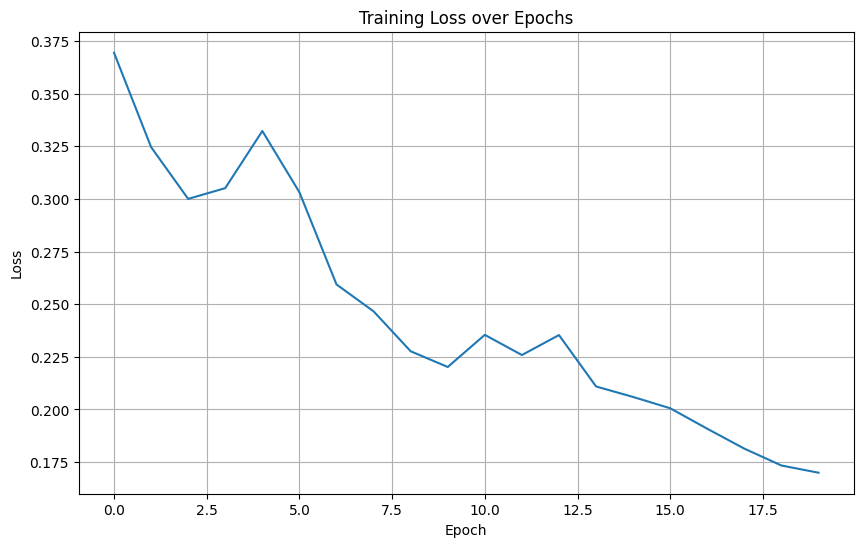

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming N, X_train, and Y_train are defined
N = len(X_train[0])  # Number of features

eta = 0.05  # Learning rate
loss_list = []  # List to store losses during training
theta = np.ones(N)  # Initial parameter values
print("Epoch \t Loss \t Training Accuracy")
# Training epochs
for i in range(20):
    loss_tmp = []  # Temporary list to store losses for each training sample
    # Iterate over training samples
    for X_i, Y_i in zip(X_train, Y_train):
        # Calculate prediction and loss for the current sample
        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))
        # Update theta using gradient descent rule
        theta = theta - eta * gradient(X_i, Y_i, theta)
    # Calculate and store the mean loss for the epoch
    loss_list.append(np.mean(loss_tmp))
    # Calculate and print training accuracy for the epoch
    acc = accuracy(X_train, Y_train, theta)
    print(f"{i} \t {loss_list[-1]:.3f} \t {acc:.3f}")

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

In [ ]:
accuracy = accuracy(X_test, Y_test, theta)
accuracy *=100
print(f"Accuracy {accuracy} %")

Accuracy 83.33333333333334 %
